## Movies by Genre - Exploratory Analysis

_Ryan Harper_

__Data Source:__ https://www.kaggle.com/tmdb/tmdb-movie-metadata/data

The dataset was pulled from Kaggle.com (an open source data science website). The user who uploaded the data, scraped content from IMDB's website. The user chose to store the movie title, budget, earnings, genre list, average rating, and the popularity score (calculated by the movie page views). This data is interesting because it looks at a large number of movies and includes data that reports on relative financial success, movie rating, and movie popularity. A movie producer could show potential investors how a new movie idea would correlate to existing successful movies while estimating basic trends for financial success, ratings, and popularity.

__Questions to explore:__ Are there quantifiable differences between Genres? Is there a relationship between budget and revenue with regards to genres? Is there a normal distribution of revenue per genre? Is there a correlation between budget and gross profits per genre? 

####  Part 1: Import libraries, import data, clean data, review basic data

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
from matplotlib.pyplot import subplots, show
import ast
import math
%matplotlib inline

sns.set_style("whitegrid")
pd.set_option('show_dimensions', False)
np.warnings.filterwarnings('ignore')

In [2]:
# import data, add gross revenue column, and delete homepage/overview columns
moviedata = pd.read_csv('tmdb_5000_movies.csv', encoding = "ISO-8859-1") 
moviedata['gross'] = moviedata['revenue'] - moviedata['budget']
del moviedata['homepage']
del moviedata['overview']
del moviedata['original_title']

In [3]:
# function for returning list of unique values in column
def find_set(series, unique=[]):
    for fulllist in series:
        fulllist = ast.literal_eval(fulllist)
        for fulldict in fulllist:
            if 'name' in fulldict:
                unique.append(fulldict['name'])          
    return set(unique)

# function for converting dictionaries to simple lists in columns
def name_fix(fulllist):
    try:
        glist=[]
        fulllist = ast.literal_eval(fulllist)
        for fulldict in fulllist:
            if 'name' in fulldict:
                glist.append(fulldict['name'])
        return ', '.join(glist)
    except (SyntaxError, ValueError, TypeError) as e:
        return fulllist

In [4]:
# creates list of unique values for specific columns with string data
un_genre = list(find_set(moviedata.genres))
un_country = list(find_set(moviedata.production_countries))
un_language = list(find_set(moviedata.spoken_languages))
un_keywords = list(find_set(moviedata.keywords))
un_companies = list(find_set(moviedata.production_companies))

# runs the name fix function to make the dataset easier to read
for column in moviedata:
    moviedata[column] = moviedata[column].apply(name_fix)

# reporting of data
print("TOTAL MOVIES: {}".format(moviedata['id'].count()))
print("COUNTRIES: {}, GENRES: {}, LANGUAGES: {}, COMPANIES: {}".format(len(un_country),len(un_genre),len(un_language),len(un_companies)))
print("BUDGET MAX: ${:,.2f} REVENUE MAX: ${:,.2f} GROSSING MAX: ${:,.2f}".format(moviedata['budget'].max(),moviedata['revenue'].max(),moviedata['gross'].max()))    
print("BUDGET MEAN: ${:,.2f} REVENUE MEAN: ${:,.2f} GROSSING MEAN: ${:,.2f}".format(moviedata['budget'].mean(),moviedata['revenue'].mean(),moviedata['gross'].mean()))          
moviedata.head()

TOTAL MOVIES: 4803
COUNTRIES: 108, GENRES: 20, LANGUAGES: 170, COMPANIES: 15000
BUDGET MAX: $380,000,000.00 REVENUE MAX: $2,787,965,087.00 GROSSING MAX: $2,550,965,087.00
BUDGET MEAN: $29,045,039.88 REVENUE MEAN: $82,260,638.65 GROSSING MEAN: $53,215,598.78


,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,gross
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",1987,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",1979,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100


There are ~4800 movies, 20 genre types, 108 countries, and ~170 languages.<br>The highest budget movie is  \$380,000,000.00. Highest revenue is  \$2,787,965,087.00. The highest grossing was  \$2,550,965,087.00 (Avatar). <br>The average budget was  \$29,045,039.88. The average revenue was  \$82,260,638.65 and the average gross was  \$53,215,598.78.

####  Part 2: Create Genre Dataframes

In [5]:
# function for checking if genre exists in a column
def genre_check(value):
    for member in un_genre:
        if member in value:
            return True
        else:
            return False

In [6]:
# creates temp columns for True/False check of each genre and deletes main genre column
for column in un_genre:
    moviedata[column] = moviedata.genres.apply(lambda value: column in value)    
del moviedata['genres']

In [7]:
# creates new dataframes for each genre and puts into genredict
genredict = {}
gross_profits = pd.DataFrame()

for column in un_genre:
    df = moviedata[moviedata[column] == True]
    genredict[column] = df.drop(un_genre, axis=1, inplace=False)    

####  Part 3: Compare Genres

In [8]:
# creates a new dataframe based on genres
dfSeries = {}
intcolumns = ['budget','popularity','revenue','runtime','vote_average','gross']
for col in intcolumns:
    poplist = []
    for genre in un_genre:
        poplist.append(moviedata[genre] == True)

    serlist = []
    for ser in poplist:
        serlist.append(moviedata.loc[ser, col].mean())
        
    dfSeries[col] = serlist
    
dfGenre = pd.DataFrame(dfSeries)
dfGenre.index = un_genre
dfGenre

,budget,gross,popularity,revenue,runtime,vote_average
War,3.528246e+07,4.887342e+07,23.777289,8.415587e+07,131.833333,6.713889
Romance,2.031136e+07,3.969103e+07,15.962426,6.000239e+07,109.379195,6.207718
Animation,6.646590e+07,1.592271e+08,38.813439,2.256930e+08,89.923077,6.341453
TV Movie,1.150000e+06,-1.150000e+06,6.389415,0.000000e+00,85.625000,5.662500
Science Fiction,5.186555e+07,1.005910e+08,36.451806,1.524565e+08,107.478505,6.005607
Fantasy,6.356061e+07,1.297936e+08,36.387043,1.933542e+08,107.278302,6.096698
Western,2.707870e+07,1.916726e+07,18.236279,4.624596e+07,117.353659,6.178049
Documentary,2.653288e+06,7.185600e+06,3.945724,9.838888e+06,93.816514,6.238182
Action,5.151075e+07,8.970235e+07,30.940382,1.412131e+08,110.544194,5.989515
Music,1.590795e+07,3.254800e+07,13.101512,4.845595e+07,109.924324,6.355676


In [9]:
dfGenre.describe()

,budget,gross,popularity,revenue,runtime,vote_average
count,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000
mean,3.172614e+07,5.741169e+07,21.770989,8.913783e+07,107.724656,6.173921
std,2.078983e+07,4.781927e+07,11.113390,6.799229e+07,12.255761,0.278476
min,6.580884e+05,-1.150000e+06,0.686787,0.000000e+00,85.625000,5.626590
25%,1.921051e+07,2.863331e+07,17.074236,4.790346e+07,99.347209,6.009644
50%,2.887664e+07,4.283355e+07,20.574595,6.872008e+07,109.485574,6.180978
75%,5.091732e+07,9.242450e+07,28.609732,1.440240e+08,110.796463,6.344325
max,6.646590e+07,1.592271e+08,39.268042,2.256930e+08,135.989848,6.719797


Voting Average doesn't vary much between genres. There seems to be a bigger standard deviation of gross profits and revenue (between genres) than budget (between genres).

####  Part 4: Visualize genres by 'budget' and 'gross' with histogram, boxplot, and scatter

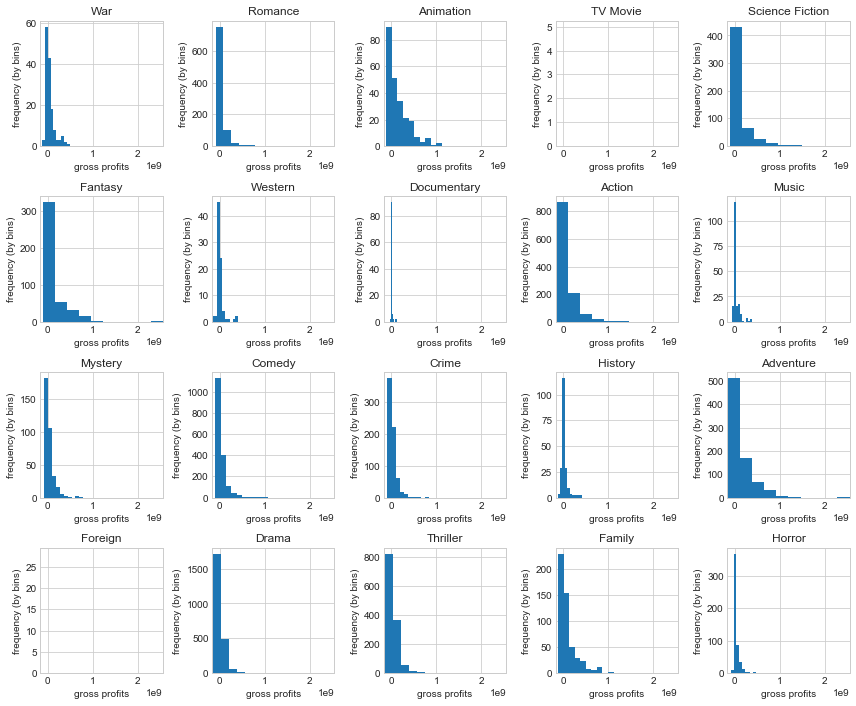

In [10]:
# hist plot of diff genres gross profits
i = 1
fig=plt.figure(figsize=(12,12))

xmin = moviedata['gross'].min()
xmax = moviedata['gross'].max()
for genre in genredict:
    plt.subplot(5, 5, i)
    
    i = i + 1
    plt.hist(genredict[genre]['gross'],bins=10)
    plt.xlim(xmin,xmax)
    plt.xlabel('gross profits')
    plt.ylabel('frequency (by bins)')
    plt.title(genre)
    
plt.tight_layout()
plt.show()

Most genres appear to be left skewed with a few exceptions that appear to be more normalized.

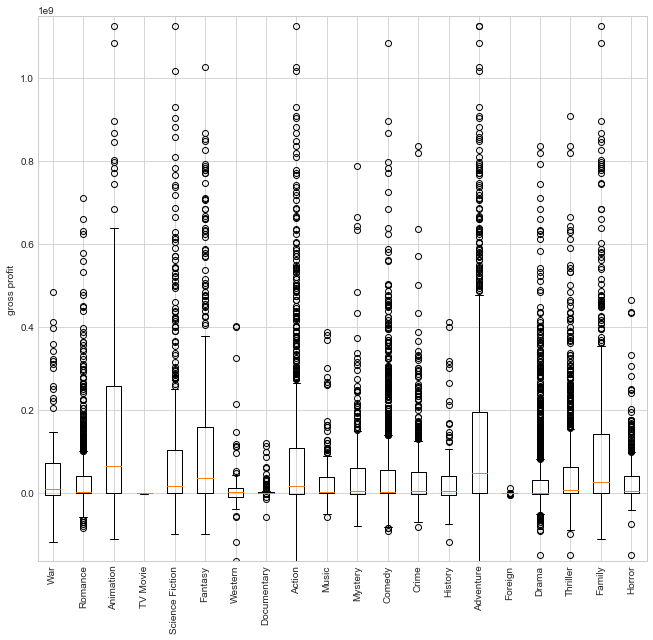

In [11]:
def ser_con(genre): return genredict[genre]['gross']

plt.figure(figsize=(9,9))
plt.boxplot(list(map(ser_con, un_genre)))
plt.xticks(list(range(1,21)), un_genre, rotation=90)
plt.ylim(moviedata['gross'].min(), moviedata['gross'].max()*.45)
plt.tight_layout()
plt.ylabel('gross profit')
plt.show()

Foreign and TV genres don't appear to have much variance.<br>Animation films appear to have the best gross profit range. <br>Romance, Horror, and Music genres seem to trend towards a positive gross profit albeit their upper quartile ranges are smaller than other high grossing genres.<br> The lower quartile range of Action and Adventure genres seem to show a larger range of financial loss.

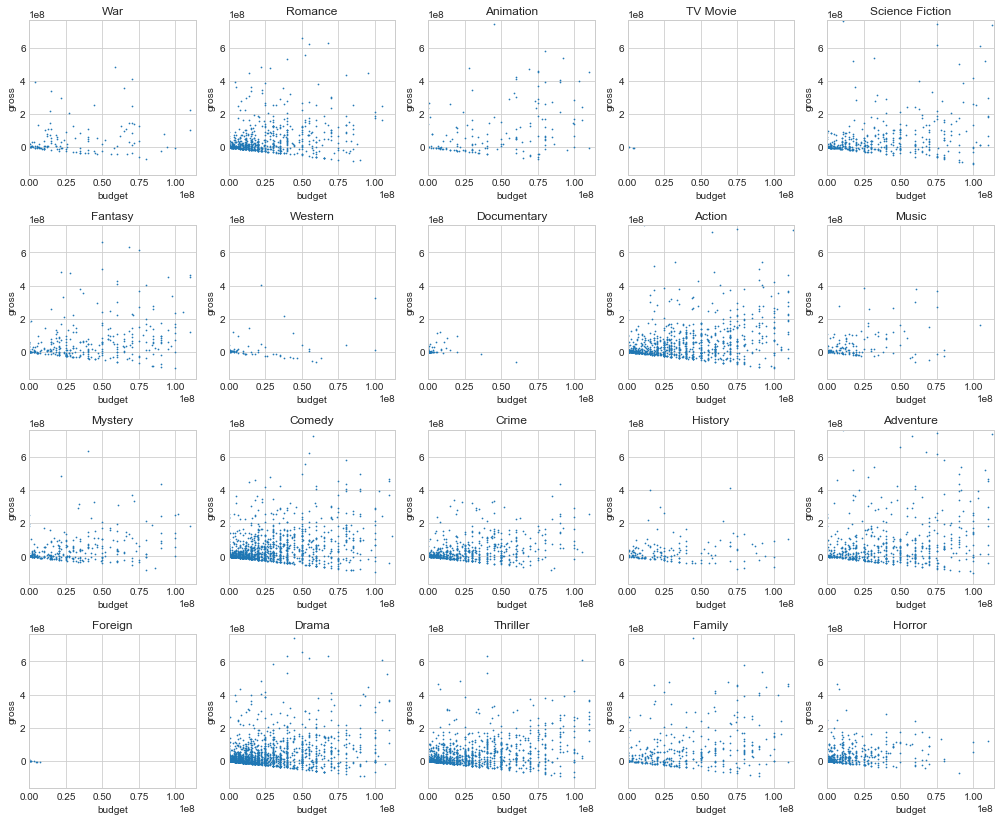

In [12]:
# plot of expense(x) to gross (y)
correlation = {}
i = 1
fig=plt.figure(figsize=(14,14))

xmin = moviedata['budget'].min()
xmax = moviedata['budget'].max()*.3
ymin = moviedata['gross'].min()
ymax = moviedata['gross'].max()*.3

for genre in genredict:
    plt.subplot(5, 5, i)
    i = i + 1
    plt.scatter(genredict[genre]['budget'],genredict[genre]['gross'],.5)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.title(genre)
    plt.xlabel('budget')
    plt.ylabel('gross')
    
    correlation[genre] = (genredict[genre]['budget'].corr(genredict[genre]['gross']))
    
plt.tight_layout()
plt.show()

The scatter plots show a better visualization of the outliers. A large number of Western films appear to have lost money. War films appear to have a wider range of profit (and or loss).

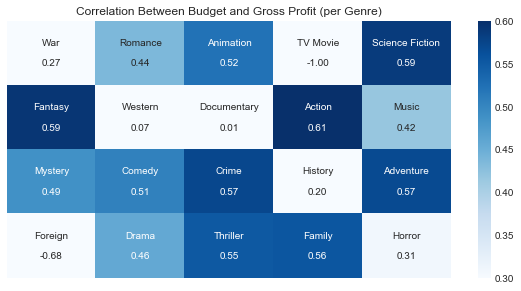

In [13]:
corr = np.array((list(correlation.values())))
labels = (np.asarray(["{}\n\n{:.2f}".format(string, value) for string, value in zip(list(correlation.keys()),corr)])).reshape(4, 5)

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr.reshape(4,5), annot=labels, square=False, ax=ax, fmt="", xticklabels=False, yticklabels=False, cmap="Blues", vmin=.3, vmax=.6)
plt.tight_layout()
plt.title('Correlation Between Budget and Gross Profit (per Genre)')
plt.show()

Genres that are dark blue (Action, Fantasy, Science Fiction) have the highest correlation between budget and profit. Genres that are white (Western, Horror, War, and History) have low correlation between budget and profit.

####  Part 5: Conclusion

__Exploratory Analysis:__ There does seem to be variance between genres with regards to budget, revenue, and gross profit. This could help investors decide which films they would want to invest in. However, there does not immediately appear to be a strong correlation between the budgeting of a film (per genre) and gross profit. <br>
<br>For example, a potential investor might look at the data to conclude: <li>Horror films in the past had a high likelihood of profiting from the film but that the total profit wasn't marginally greater than the budget of the film. <li>Action and Adventures films, appear to have a high risk, high reward with regards to profit.<li>Animation films seem to have the highest median gross profit.

__(Possible) Hypothesis:__ Budget for action, fantasy, and/or science fiction films will predict gross profit with some degree of success.

__Difficulties:__ <li>The data correlations aren't that high<li>Plotting 20 genres with subplots <li>Mapping Genre DFs to PLT<li>Scatter plots are misleading (with regards to the y-axis)